In [2]:
import keras #keras疯转了Tensorflow操作变的简单而已
from keras.datasets import cifar10
# 序贯模型，我们就在序贯模型中添加神经网络结构
# 之前的网络模型：第一层计算了，交给第二层，第二层计算了交给第三层
# 依次类推
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

import tensorflow as tf
# 这是一个类，作用生成更多图片，基于原来的图片生成（有差异的） 
# ImageDataGenerator可以在原图的基础上，进行调整，图片数据，衍生
# 使用实时数据增强生成一批张量图像数据
from keras.models import load_model

### 加载数据，类型变换，归一化和one-hot编码

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# 归一化，除255，为什么jpg，0~255，数值表示，图片的像素值
# 数值归一化到0~1
X_train /= 255
X_test /= 255
y_train = keras.utils.to_categorical(y_train,num_classes=10)
# 独热编码
y_test = keras.utils.to_categorical(y_test,num_classes=10)


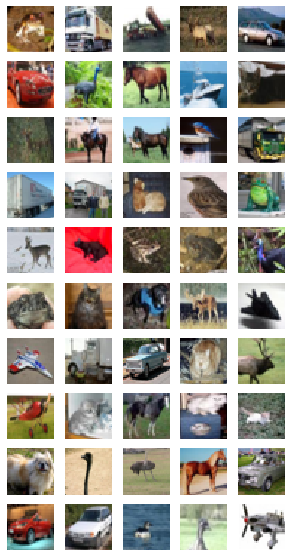

In [4]:
plt.figure(figsize=(1*5,1*10))
for i in range(50):
    ax = plt.subplot(10,5,i+1)
    image = X_train[i]
    ax.imshow(image)
    ax.axis('off')

### 声明变量

In [5]:
batch_size = 32
num_classes = 10
epochs = 100

### keras生成的模型 就是CNN

In [6]:
model = Sequential()#序贯模型，根据顺序进行计算，Model
model.add(Conv2D(32, (3, 3), padding='same',input_shape=[32,32,3]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),activation = tf.nn.relu))
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3),activation = keras.activations.relu))
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

### 告诉算法，损失用什么，优化用什么，评价指标用什么

In [7]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt,
              metrics=['accuracy'])

In [8]:
# 加载原来模型的权重
model.load_weights('./keras-cifar-10-trained-model.h5')

### 上面加载了之前训练好的模型的系数权重

### 直接进行应用

In [9]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 5s 518us/step


[0.6641710855960846, 0.7728000283241272]

### 模型训练（继续训练，原来的基础上继续训练，大概是77%）

In [10]:
# keras特别像之前sklearn中算法训练方式
model.fit(X_train, y_train,#训练数据
              batch_size=batch_size,#一次训练给多少数据
              epochs=2,#进行多少次训练
              validation_data=(X_test, y_test),#验证，测试数据
              shuffle=True)#打乱数据的顺序

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 168s 3ms/step - loss: 0.6106 - accuracy: 0.7842 - val_loss: 0.6907 - val_accuracy: 0.7646
Epoch 2/2
50000/50000 [==============================] - 163s 3ms/step - loss: 0.5922 - accuracy: 0.7935 - val_loss: 0.6555 - val_accuracy: 0.7772


### 上面一步步模型构建和训练过程

### 将辛辛苦苦，训练好的模型保存

In [11]:
moded_name = 'keras-cifar-10-trained-model3.h5'
model.save(moded_name)